In [1]:
import matplotlib.pyplot as plt
import tools
import protostar
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
directory = '../dataSpring2025'
star = tools.open_pickle(f'{directory}/HH212M')
arc_res = star.red_shifted.header['CDELT2']*(3600)
arc_res

0.100000000000008

# Analysis

To add to the analysis, we need to manually add the name of the star and its respective bolometric temperature to the two arrays below: `star_list` and `t_bols`. It will automatically plot and update the regression line.

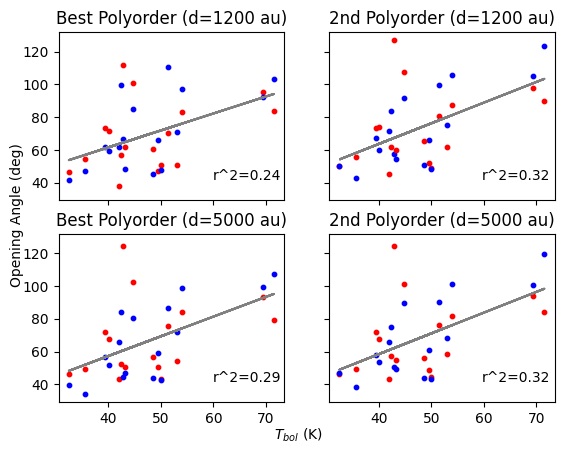

In [4]:
directory = '../dataSpring2025'
star_list = ['HH212M', 'HOPS-12E', 'HOPS-50', 'HOPS-53', 'HOPS-81', 'HOPS-88', 'HOPS-96',
             'HOPS-124', 'HOPS-153', 'HOPS-164', 'HOPS-168', 'HOPS-169', 'HOPS-224', 'HOPS-247',
             'HOPS-250', 'HOPS-370', 'HOPS-303']

t_bols = [53, 42, 51.4, 49.5, 40.1, 42.4, 35.6, 44.8, 39.4, 50, 54, 32.5, 48.6, 42.8, 69.4, 71.5,
          43.2]

red_best_30 = []
blue_best_30 = []
red_2nd_30 = []
blue_2nd_30 = []
red_best_50 = []
blue_best_50 = []
red_2nd_50 = []
blue_2nd_50 = []

size = 10
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
for star_name, t_bol in zip(star_list, t_bols):
    star = tools.open_pickle(f'{directory}/{star_name}')
    red_angles = star.red_shifted.angle_spectrum
    blue_angles = star.blue_shifted.angle_spectrum

    distance = 30
    axs[0,0].set_title(f'Best Polyorder (d=1200 au)')
    axs[0,0].scatter(t_bol, red_angles['best'][distance], c='red', s=size)
    axs[0,0].scatter(t_bol, blue_angles['best'][distance], c='blue', s=size)
    red_best_30.append(red_angles['best'][distance][0])
    blue_best_30.append(blue_angles['best'][distance][0])

    axs[0,1].set_title(f'2nd Polyorder (d=1200 au)')
    axs[0,1].scatter(t_bol, red_angles['order2'][distance], c='red', s=size)
    axs[0,1].scatter(t_bol, blue_angles['order2'][distance], c='blue', s=size)
    red_2nd_30.append(red_angles['order2'][distance][0])
    blue_2nd_30.append(blue_angles['order2'][distance][0])

    distance = 50
    axs[1,0].set_title(f'Best Polyorder (d=5000 au)')
    axs[1,0].scatter(t_bol, red_angles['best'][distance], c='red', s=size)
    axs[1,0].scatter(t_bol, blue_angles['best'][distance], c='blue', s=size)
    red_best_50.append(red_angles['best'][distance][0])
    blue_best_50.append(blue_angles['best'][distance][0])

    axs[1,1].set_title(f'2nd Polyorder (d=5000 au)')
    axs[1,1].scatter(t_bol, red_angles['order2'][distance], c='red', s=size)
    axs[1,1].scatter(t_bol, blue_angles['order2'][distance], c='blue', s=size)
    red_2nd_50.append(red_angles['order2'][distance][0])
    blue_2nd_50.append(blue_angles['order2'][distance][0])

fig.text(0.5, 0.04, r'$T_{bol}$ (K)', ha='center', va='center')
fig.text(0.06, 0.5, 'Opening Angle (deg)', ha='center', va='center', rotation='vertical')
#axs[0,0].set_xlim(10)

x = t_bols + t_bols
yy = [[red_best_30 + blue_best_30], [red_2nd_30 + blue_2nd_30], 
     [red_best_50 + blue_best_50],[red_2nd_50 + blue_2nd_50]]

for idx, y in enumerate(yy):
    x = np.array(x)
    x_reshaped = x.reshape(-1, 1)
    y = np.array(y)[0]
    
    model = LinearRegression()
    model.fit(x_reshaped, y)
    y_pred = model.predict(x_reshaped)
    r2 = r2_score(y, y_pred)

    axs[0 if idx<2 else 1,idx%2].plot(x, y_pred, color='grey', label=f'R^2={r2:.2f}')
    fig.text(0.42*(1+idx%2), 0.58 if idx<2 else 0.16, f'r^2={r2:.2f}', ha='center', va='center')